# Shreya Akurathi
# 200968188
# Phase 1

The dataset is provided by GroupLens and can be downloaded from here it contains the following files(links.csv, movies.csv, ratings.csv, and tags.csv)

"This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996, and September 24, 2018. This dataset was generated on September 26, 2018."

Aim:  Build  a  movie  recommendation  system  based  on  ‘MovieLens’  dataset. 
Integrate  the  aspects  of  personalization  of  user  with  the  overall features of movie such as genre, popularity etc.


## Approach that i have planned: Hybrid

Hybrid is a mix of content based and collaborative filtering methods.
Hybrid helps mitigate the cold start problem, hence i have chosen this method.


Content based filtering uses item features to recommend other items similar to what the user likes, based on their feedback.
Collaborative filtering uses similarities between users and items at the same time to give recommendations

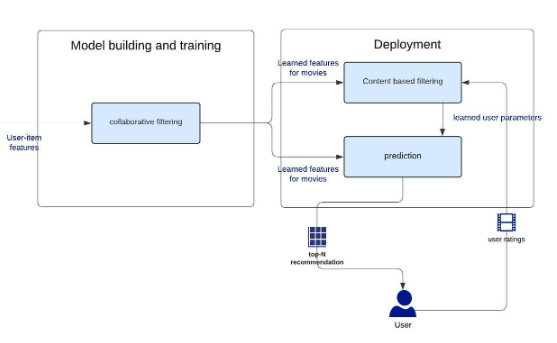

In content based:
    User profile based on item profiles
Genre
Year of release of movie
Movie - Movie similarity


In collaborative filtering:KNN (k- nearest neighbors) algorithm using Surprise library

Variations of KNN based approaches:
KNNBasic
KNNwithMeans
KNNWithZScore
KNNBaseline : integrates the baseline estimate ratings

Similarity metrics:
Cosine similarity
Mean square difference based similarity
Pearson coefficient (mean-centered cosine similarity)
Pearson Baseline (uses global baselines for centering instead of means)


# STEPS TO PREPROCESS DATA
1. IMPORT LIBRARIES
2. IMPORT DATASETS
3. HANDLE MISSING DATA
4. ENCODE CATEGORICAL DATA
5. SPLIT INTO TESTING AND TRAINING
6. FEATURE SCALING

# 1.Import Libraries


In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 2. Import Datasets

In [2]:
m_d=pd.read_csv(r'C:\Users\shrey\OneDrive\Desktop\ML\ml-latest-small\movies.csv')
r_d=pd.read_csv(r'C:\Users\shrey\OneDrive\Desktop\ML\ml-latest-small\ratings.csv')
l_d=pd.read_csv(r'C:\Users\shrey\OneDrive\Desktop\ML\ml-latest-small\links.csv')
t_d=pd.read_csv(r'C:\Users\shrey\OneDrive\Desktop\ML\ml-latest-small\tags.csv')

In [3]:
m_d.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
m_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
l_d.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
t_d.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
r_d.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
#convert timestamp in r_d and t_d to something more readable

r_d['timestamp'] = pd.to_datetime(r_d['timestamp'], unit='s')
r_d.columns = ['userId', 'movieId','rating' ,'timing']
r_d.head(5)


,userId,movieId,rating,timing
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [9]:
t_d['timestamp'] = pd.to_datetime(t_d['timestamp'], unit='s')
t_d.columns = ['userId', 'movieId','tag' ,'timing']
t_d.head(5)

,userId,movieId,tag,timing
0,2,60756,funny,2015-10-24 19:29:54
1,2,60756,Highly quotable,2015-10-24 19:29:56
2,2,60756,will ferrell,2015-10-24 19:29:52
3,2,89774,Boxing story,2015-10-24 19:33:27
4,2,89774,MMA,2015-10-24 19:33:20


# 3. Checking for missing values

In [10]:
m_d.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
t_d.isnull().sum()

userId     0
movieId    0
tag        0
timing     0
dtype: int64

In [12]:
l_d.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [13]:
l_d.shape

(9742, 3)

Although there are 8 missing values for tmdbId, I chose to not delete or take the average of the rows since they are unique IDs for each movie

In [14]:
r_d.isnull().sum()

userId     0
movieId    0
rating     0
timing     0
dtype: int64

# 4. Encode categorical data

Encoding measures like label encoding or one hot encoding is not required at this point of time.

# 5. Split into test and train


Will be done later into the project (during model building)

# 6. Feature engineering 

Will be done as needed later during model building
For ex: intermediate values of ratings will be normalised later in the notebook


#  Data Cleaning


In [15]:
#Merging two datasets movies and rating

df = pd.merge(r_d, m_d, on='movieId' , how='left')
df.head(5)

,userId,movieId,rating,timing,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [16]:
#Finding the different types of genres in the dataset

genres_unique = pd.DataFrame(df['genres'].str.split('|').tolist()).stack().unique()
genres_list=genres_unique[:len(genres_unique)-1]
genres_unique

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Action', 'Crime', 'Thriller', 'Mystery', 'Horror',
       'Drama', 'War', 'Western', 'Sci-Fi', 'Musical', 'Film-Noir',
       'IMAX', 'Documentary', '(no genres listed)'], dtype=object)

# Checking for Noisy data

In [166]:
no_user_voted = df.groupby('movieId')['rating'].agg('count')
no_movies_voted = .groupby('userId')['rating'].agg('count')

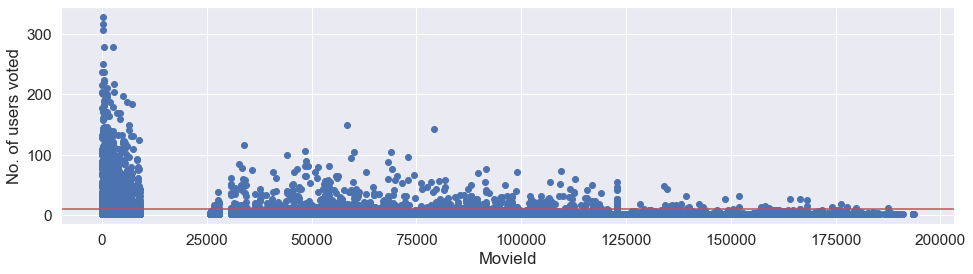

In [168]:
f, ax = plt.subplots(1,1, figsize=(16,4))


plt.scatter(no_user_voted.index, no_user_voted)
plt.axhline(y=10, color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

There isn't any significant noise, however if we wish we can make changes as per the threshold value to prevent sparcity (especially in case of knn algorithms)

# EDA

## 1. TOP 10 MOST RATED MOVIES

In [62]:
vc= df['title'].value_counts()
vc

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Sex, Drugs & Taxation (2013)          1
Extraordinary Tales (2015)            1
Tomorrow (2015)                       1
Embrace of the Serpent (2016)         1
31 (2016)                             1
Name: title, Length: 9719, dtype: int64

In [111]:
vc_df = pd.DataFrame(vc)
vc_df= vc_df.reset_index()
vc_df.columns = ['genre', 'instances'] 
vc_df

,genre,instances
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
...,...,...
9714,"Sex, Drugs & Taxation (2013)",1
9715,Extraordinary Tales (2015),1
9716,Tomorrow (2015),1
9717,Embrace of the Serpent (2016),1


<AxesSubplot:>

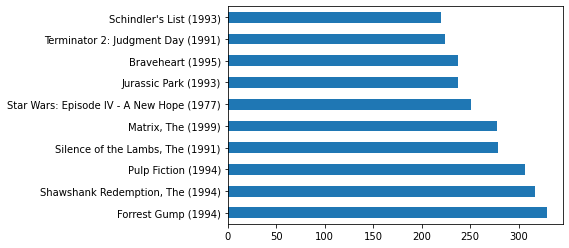

In [37]:
df['title'].value_counts()[:10].plot(kind='barh')

The movie Forrest Gump (1994) received the most amount of ratings - 329


### What distribution of movies recieve a mean amount of reviews?

<AxesSubplot:>

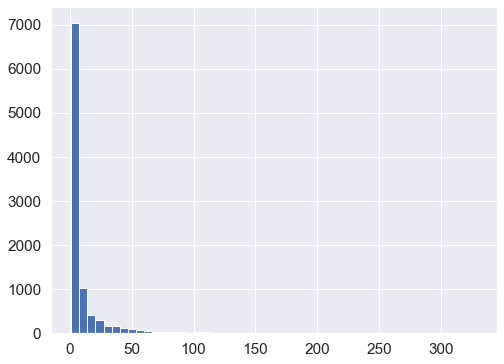

In [131]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
vc_df['instances'].hist(bins=50)

Most movies recieve less than 50 reviews, the number of movies that recieve more than 100 reviews are very less


## 2. Most popular genre

In [34]:
dummies = df['genres'].str.get_dummies()
dummies

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
100832,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
100833,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
100834,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [101]:
graph = dummies.sum().sort_values()
graph

(no genres listed)       47
Film-Noir               870
Documentary            1219
Western                1930
Musical                4138
IMAX                   4145
War                    4859
Animation              6988
Horror                 7291
Mystery                7674
Children               9208
Fantasy               11834
Crime                 16681
Sci-Fi                17243
Romance               18124
Adventure             24161
Thriller              26452
Action                30635
Comedy                39053
Drama                 41928
dtype: int64

In [108]:
genres = pd.DataFrame(graph)
genres= genres.reset_index()
genres.columns = ['genre', 'instances'] 
genres

,genre,instances
0,(no genres listed),47
1,Film-Noir,870
2,Documentary,1219
3,Western,1930
4,Musical,4138
5,IMAX,4145
6,War,4859
7,Animation,6988
8,Horror,7291
9,Mystery,7674


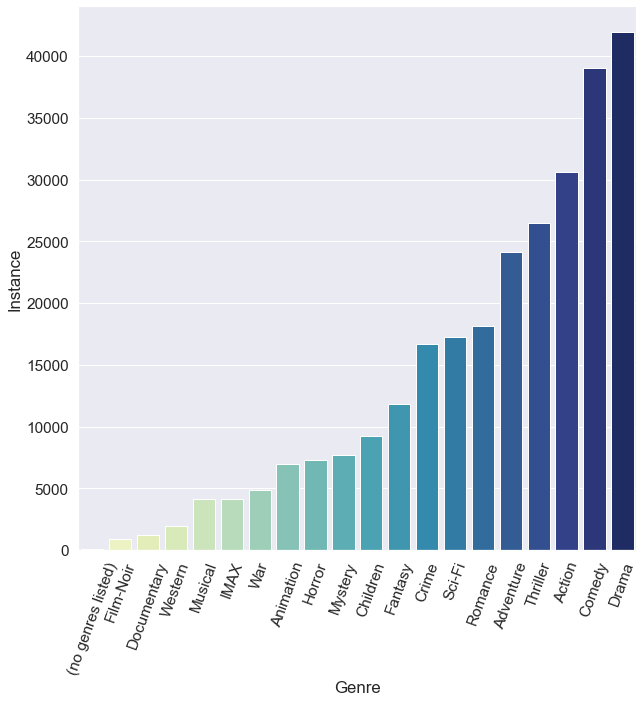

In [136]:
plt.figure(figsize=(10,10))
sns.barplot(x = "genre", y = "instances", palette = 'YlGnBu', data = genres)
plt.xticks(rotation=70)
plt.xlabel("Genre")
plt.ylabel("Instance")
plt.show()

## 3.Number of ratings (based on yearwise release date)

In [66]:
# Splitting year from title
f= df['title'].str.slice(start=-5, stop= -1)
f

0         1995
1         1995
2         1995
3         1995
4         1995
          ... 
100831    2017
100832    2017
100833    2017
100834    2017
100835    2017
Name: title, Length: 100836, dtype: object

In [68]:
df['Year of Release']= f
df

,userId,movieId,rating,timing,title,genres,genre_1,genre_2,Year of Release
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,1995
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,1995
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,Action,Crime,1995
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,Mystery,Thriller,1995
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,Crime,Mystery,1995
...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller,Drama,Horror,2017
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller,Action,Crime,2017
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror,Horror,Horror,2017
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi,Action,Sci-Fi,2017


In [76]:
v=df['Year of Release'].value_counts()
v

1995    6143
1994    5296
1999    4535
1996    4509
2000    4268
        ... 
atso       1
1917       1
1908       1
995)       1
973)       1
Name: Year of Release, Length: 127, dtype: int64

In [104]:
v_df = pd.DataFrame(v)
v_df= v_df.reset_index()
v_df.columns = ['Yo Release', 'instances'] 
v_df

,Yo Release,instances
0,1995,6143
1,1994,5296
2,1999,4535
3,1996,4509
4,2000,4268
...,...,...
122,atso,1
123,1917,1
124,1908,1
125,995),1


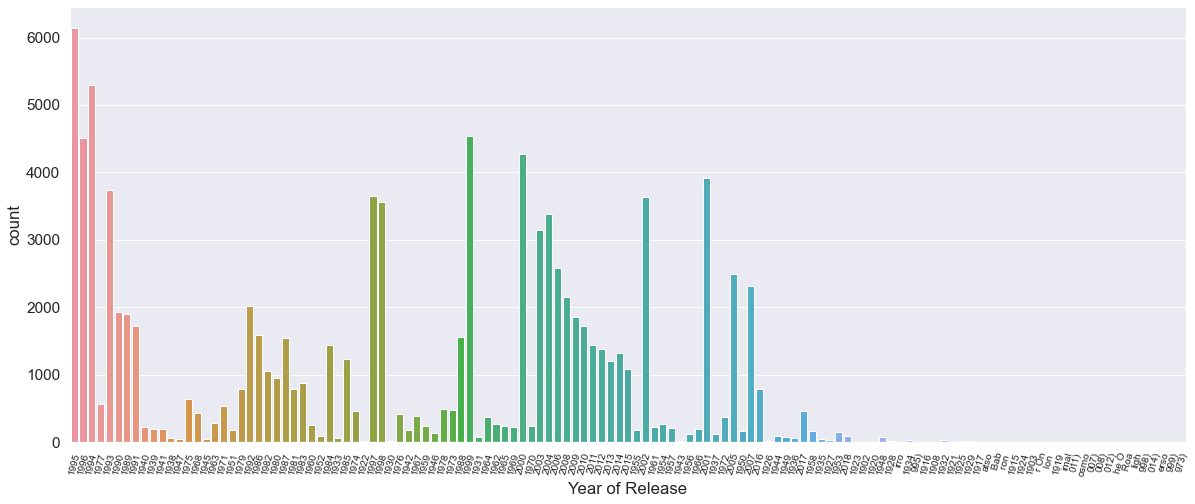

In [163]:
plt.figure(figsize=(20, 8))
sns.countplot(x='Year of Release',data=df)
plt.xticks(rotation=75, fontsize = 10)
plt.show()

## 4. Number of ratings each year

In [89]:
df['Year of Rating']= df['timing'].dt.year
df

,userId,movieId,rating,timing,title,genres,genre_1,genre_2,Year of Release,Year of Rating
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,1995,2000
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,1995,2000
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,Action,Crime,1995,2000
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,Mystery,Thriller,1995,2000
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,Crime,Mystery,1995,2000
...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller,Drama,Horror,2017,2017
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller,Action,Crime,2017,2017
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror,Horror,Horror,2017,2017
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi,Action,Sci-Fi,2017,2017


In [92]:
rating_graph= df['Year of Rating'].value_counts()
rating_graph

2000    10061
2017     8198
2007     7114
2016     6703
2015     6616
2018     6418
1996     6040
2005     5813
2012     4656
2008     4351
2009     4158
2006     4059
2003     4014
2001     3922
2002     3478
2004     3279
1999     2439
2010     2301
1997     1916
2011     1690
2013     1664
2014     1439
1998      507
Name: Year of Rating, dtype: int64

<AxesSubplot:title={'center':'Ratings per year'}>

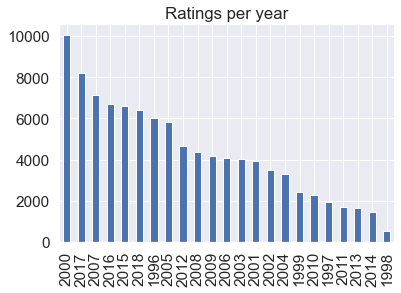

In [93]:
r=rating_graph.plot.bar(title="Ratings per year");
r

In [106]:
rating_g= pd.DataFrame(rating_graph)
rating_g=rating_g.reset_index()
rating_g.columns = ['Year of rating', 'instances'] 
rating_g

,Year of rating,instances
0,2000,10061
1,2017,8198
2,2007,7114
3,2016,6703
4,2015,6616
5,2018,6418
6,1996,6040
7,2005,5813
8,2012,4656
9,2008,4351


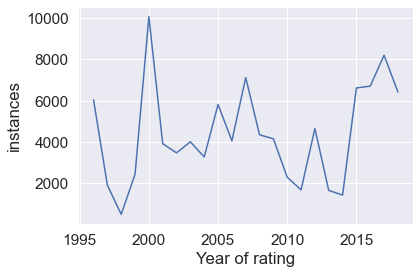

In [116]:
sns.lineplot(x="Year of rating", y="instances", data=rating_g)
plt.show()

Was expecting exponential growth in ratings each year given more people around the world joining the internet every year well This result points towards the fact this small MovieLens dataset is  not reflective enough of real data consistency.

## 5. Find the mean rating of each movie title

In [123]:
gb_df=pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending = False))
gb_df

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
...,...
Don't Look Now (1973),0.5
Journey 2: The Mysterious Island (2012),0.5
Joe Dirt 2: Beautiful Loser (2015),0.5


In [124]:
gb_df.head(10)

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
"Thin Line Between Love and Hate, A (1996)",5.0
Lesson Faust (1994),5.0
Eva (2011),5.0
Who Killed Chea Vichea? (2010),5.0


### What are the top 10 movies based on rating?


In [125]:
r_d.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


### Rating Distribution of movies (pie chart)

In [145]:
gb_df['rating_counts'] = pd.DataFrame(df.groupby('title')['rating'].count())
gb_df

,rating,rating_counts
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1
...,...,...
Don't Look Now (1973),0.5,1
Journey 2: The Mysterious Island (2012),0.5,1
Joe Dirt 2: Beautiful Loser (2015),0.5,1


In [ ]:
#Normalisation of ratings to better fit the pie chart

### Histogram for average ratings

<AxesSubplot:>

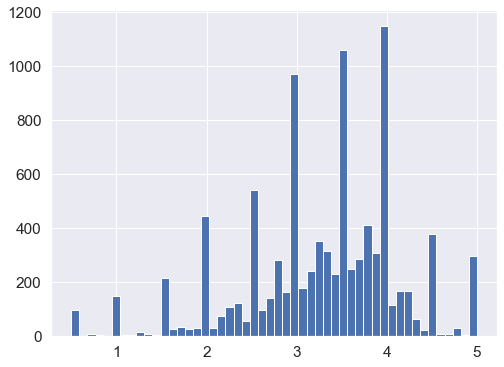

In [137]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
gb_df['rating'].hist(bins=50)

Integer values have taller bars than the floating values since most of the users assign rating as integer value i.e. 1, 2, 3, 4 or 5. 
Data has a weak normal distribution with the mean of around 3.5. 
There are a few outliers in the data.

### How are the different rating scores distributed across genres? 


In [192]:
df.groupby('genres')['rating']

## 6. WORD CLOUD (genre wise)


In [156]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')


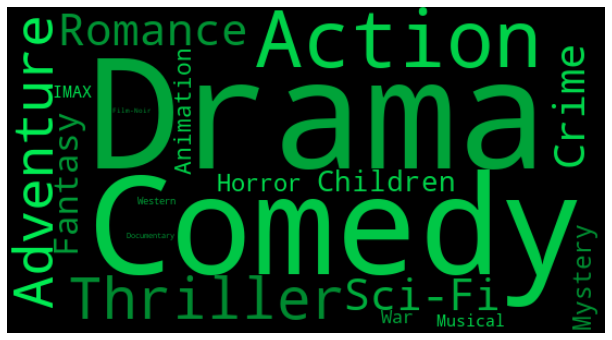

In [157]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

words = dict()
for s in genre_count:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## 7. Correlation - here we will be trying to find all the movies similar to Forrest Gump

In [170]:
user_movie_rating = df.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']

In [173]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

C:\Users\shrey\anaconda3\envs\movietest1\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\shrey\anaconda3\envs\movietest1\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [174]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


the movies that have high correlation with Forrest.. are not very well known. 
This shows that correlation alone is not a good metric for similarity because there can be a user who watched .

A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings. 

## Movie Rating trend by year (Time series+genre) - to check if there are any cyclic patterns

In [165]:
rts = df.set_index('timings').sort_index()


KeyError: "None of ['timings'] are in the columns"

## Most Used Adjective (word cloud)

## Rating distribution by genre (stacked bar)

## Has the average rating changed over time?